# Classifier for the MNIST dataset using TensorFlow (TF.Keras)
This is a "Hello world!" example with TensorFlow.  
It trains a convolutional neural network on the MNIST dataset.  

Credits:   
MNIST dataset, see http://yann.lecun.com/exdb/mnist/  
Code adapted from the documentation by the TensorFlow and Keras team https://www.tensorflow.org/

In [ ]:
import tensorflow as tf
tf.__version__

In [ ]:
# This notebook is intended to be run with GPU resources
tf.config.list_physical_devices('GPU')

In [3]:
# data for mnist
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)


In [ ]:
# This model uses convolutional neural network layers

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.summary()

optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.sparse_categorical_crossentropy

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [6]:
# Train the model on the training data

history = model.fit(x_train, y_train, batch_size=64, 
                    validation_data=(x_test, y_test),
                    epochs=10)


Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0204 - accuracy: 0.9931 - val_loss: 0.0217 - val_accuracy: 0.9930
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0187 - accuracy: 0.9939 - val_loss: 0.0250 - val_accuracy: 0.9922
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0189 - accuracy: 0.9939 - val_loss: 0.0226 - val_accuracy: 0.9925
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0175 - accuracy: 0.9942 - val_loss: 0.0268 - val_accuracy: 0.9918
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0182 - accuracy: 0.9936 - val_loss: 0.0224 - val_accuracy: 0.9929
Epoch 6/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0159 - accuracy: 0.9946 - val_loss: 0.0243 - val_accuracy: 0.9925
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0155 - accuracy: 0.9945 - val_loss: 0.0267 - val_accuracy: 0.9929
Epoch 

# Trained model performance


In [7]:
# Compute the loss and accuracy on the test data

test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"The accuracy on the test dataset is {round(test_accuracy,4)}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0263 - accuracy: 0.9927
The accuracy on the test dataset is 0.9927


In [8]:
import matplotlib.pyplot as plt
import numpy as np

## Zoom in on a test case

In [9]:
# Use the model to predict the probabilities of each digit from the first test sample

model.predict(x_test[0].reshape(1,28,28,1))

1/1 [==============================] - 0s 216ms/step


array([[5.1579474e-12, 2.2326599e-08, 4.4545445e-08, 1.8066143e-09,
        2.6469557e-10, 9.0394258e-14, 1.3470490e-15, 9.9999988e-01,
        1.0610262e-11, 8.4223997e-09]], dtype=float32)

In [10]:
# Find the most likely digit from the model prediction

np.argmax(model.predict(x_test[0].reshape(1,28,28,1)))

1/1 [==============================] - 0s 45ms/step


7

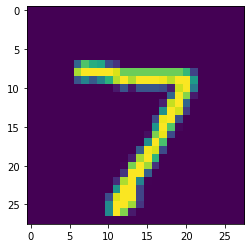

In [11]:
# Visual inspection on the image

plt.figure()
plt.imshow(x_test[0].reshape(28,28));

In [12]:
# Image label value

y_test[0]

7